 ## Guía de Trabajos Prácticos 1

# **Librerías**

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import sys

print("Python version %s / OpenCV version %s " %(sys.version,cv.__version__))

Python version 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0] / OpenCV version 4.8.0 


Activo mi entorno GDrive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Operaciones Puntuales**

## **Ejercicio 1:**
Conociendo la ecuación general de una transformación lineal: s = ar + c
con r: valor de entrada, a: factor de ganancia y c: offset, realice los siguientes ejercicios:

1. Implemente una LUT del mapeo entre la entrada y la salida

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Función general:
def LUT(a, c, r=[0,256]):         # por default de 0 a 255, si le paso parámetro hace en un tramo específico
    r = np.arange(r[0],r[1],1)    # arma vector con paso 1 para aplicar TL punto a punto
    s = np.multiply(r,a) + c      # TL

    # para que no se vaya del rango:
    s = np.where(s>255,255,s)   # mayor que 255: 255
    s = np.where(s<0,0,s)       # menor que 0: 0
    return s


2. Pruebe la rutina con diferentes juegos de coeficientes a y c, sobre diversas
imágenes, y muestre en una misma ventana la imagen original, el mapeo aplicado y la imagen obtenida

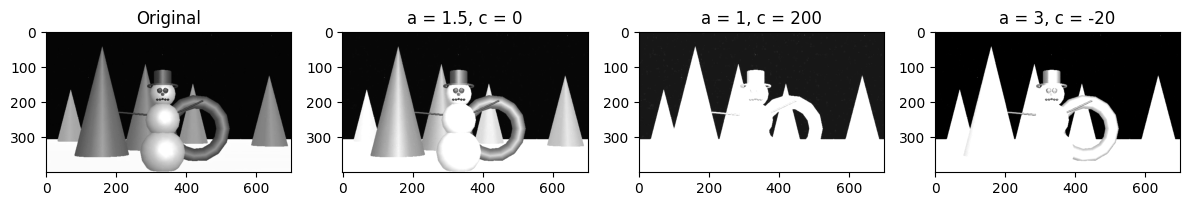

In [4]:
# CARGO IMAGEN:
entrada = cv.imread("/content/drive/My Drive/PDI/snowman.png",cv.IMREAD_GRAYSCALE)

# Aplico la LUT:
par_1 = [1.5,0] # PARÁMETROS
mapeo1 = LUT(par_1[0],par_1[1])
salida1 = mapeo1[entrada[:]]

par_2 = [1, 200] # PARÁMETROS
mapeo2 = LUT(par_2[0],par_2[1])
salida2 = mapeo2[entrada[:]]

par_3 = [3,-20] # PARÁMETROS
mapeo3 = LUT(par_3[0],par_3[1])
salida3 = mapeo3[entrada[:]]

# GRAFICO:
fig, ax = plt.subplots(1, 4, figsize=(12,4))
ax[0].imshow(entrada, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(salida1, cmap='gray')
ax[1].set_title(f'a = {par_1[0]}, c = {par_1[1]}')
ax[2].imshow(salida2, cmap='gray')
ax[2].set_title(f'a = {par_2[0]}, c = {par_2[1]}')
ax[3].imshow(salida3, cmap='gray')
ax[3].set_title(f'a = {par_3[0]}, c = {par_3[1]}')
plt.tight_layout()
plt.show()

3. Implemente el negativo de la imagen de entrada.

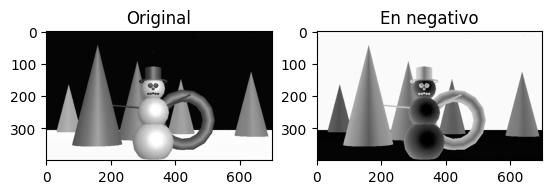

In [5]:
mapeo_neg = LUT(-1,255)
salida_neg = mapeo_neg[entrada[:]]

# GRAFICO:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(entrada, cmap='gray')
ax[0].set_title("Original")
ax[1].imshow(salida_neg, cmap='gray')
ax[1].set_title("En negativo")

plt.show()

4. Genere diversas LUT con estiramientos y compresiones lineales por tramos
de la entrada, y pruebe los resultados sobre diversas imágenes.



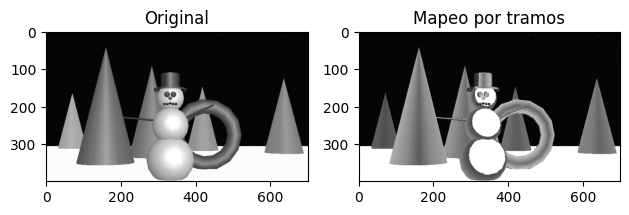

In [6]:
# Función por tramos:
def LUT_tramos(tramos):
    s = np.arange(0,256,1)  # inicializo formato de salida
    for tramo in tramos:    # para cada tramo que definí tengo: [ganancia, offset, ini, fin]
      s[tramo[2]:tramo[3]] = LUT(tramo[0],tramo[1],[tramo[2],tramo[3]])  # uso función general que armé antes
    return s

# APLICAMOS A IMAGEN

# TRAMO 1: No cambio nada
t1 = [1,0,0,64]       # [ganancia, offset, ini, fin]
# TRAMO 2: Negativo
t2 = [-1,255,64,184]  # [ganancia, offset, ini, fin]
# TRAMO 3: Cambios pequeños
t3 = [1.5,20,184,255] # [ganancia, offset, ini, fin]

tramos = [t1,t2,t3]
mapeo_tramos = LUT_tramos(tramos)
salida_tramos = mapeo_tramos[entrada[:]]

# GRAFICO:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(entrada, cmap='gray')
ax[0].set_title("Original")
ax[1].imshow(salida_tramos, cmap='gray')
ax[1].set_title("Mapeo por tramos")
plt.tight_layout()
plt.show()

5. (Opcional): genere una imagen binaria de 256x256 que simule los ejes cartesianos de la transformaci´on r − s, marcando la l´ınea identidad. Capture dos puntos que marquen el final de los segmentos, y genere la LUT con una transformaci´on que parta del origen, pase por los puntos marcados, y finalice en el punto (256,256). Pruebe la rutina con diversas im´agenes. Recomendaci´on: utilizar matplotlib (https://matplotlib.org/) con subplots, y para manejos de eventos, ver: https://matplotlib.org/users/event\_handling.html


## **Ejercicio 2:**
1. Implemente la transformación logarítmica s = log(1 + r) y la transformación
de potencia s = r γ (c=1).
2. Realice el procesado sobre la imagen ’rmn.jpg’, utilizando los dos procesos
por separado.

In [7]:
# defino funciones con c = 1 y asumiendo el tramo completo 0:255

def t_log():
  r = np.arange(256)
  s = np.log10(1+r)
  return s

def t_pow(gamma):
    r = np.arange(256)/255.0  # normalizo para aplicar potencia
    s = pow(r,gamma)          # aplico potencia
    return s*255.0            # devuelvo al rango 0:255

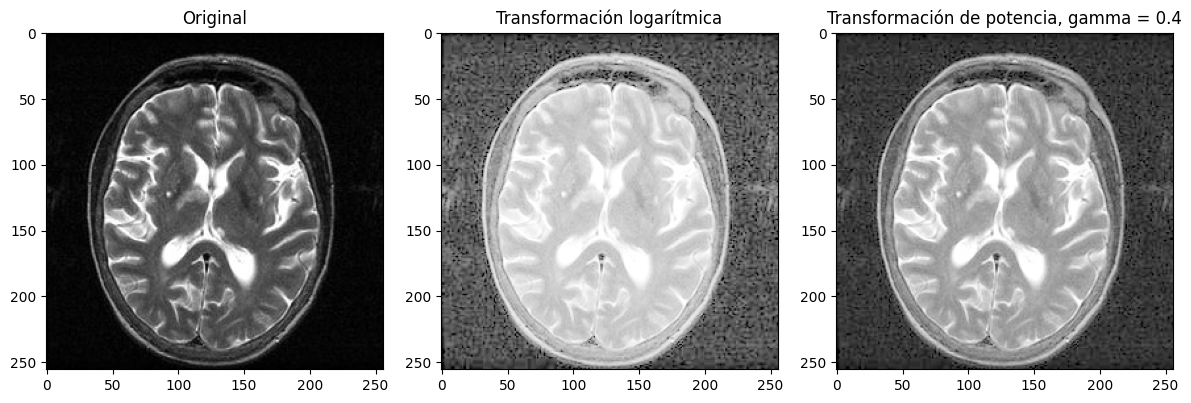

In [8]:
# CARGO IMAGEN:
entrada2 = cv.imread("/content/drive/My Drive/PDI/rmn.jpg",cv.IMREAD_GRAYSCALE)

# APLICO MAPEOS:
mapeo_log = t_log()
salida_log = mapeo_log[entrada2[:]]

gamma = 0.4
mapeo_pow = t_pow(gamma)
salida_pow = mapeo_pow[entrada2[:]]

# GRAFICO:
fig, ax = plt.subplots(1, 3, figsize=(12,4))
ax[0].imshow(entrada2, cmap='gray')
ax[0].set_title("Original")
ax[1].imshow(salida_log, cmap='gray')
ax[1].set_title("Transformación logarítmica")
ax[2].imshow(salida_pow, cmap='gray')
ax[2].set_title(f"Transformación de potencia, gamma = {gamma}")

plt.tight_layout()
plt.show()

## **Ejercicio 3:**
1. Implemente una función que realice las siguientes operaciones aritméticas sobre dos imágenes que sean pasadas como parámetros:
a) Suma. Normalice el resultado por el número de imágenes

In [9]:
def suma(imagenes):
  salida = imagenes.sum(axis=0)              # sumo
  salida[:] = salida[:]/imagenes.shape[0]    # normalizo
  return salida

b) Diferencia. Aplique las dos funciones de reescalado usadas típicamente para evitar el desborde de rango (sumar 255 y dividir por 2, o restar el mínimo y escalar a 255).


In [10]:
def diferencia(img1,img2):
  salida = img1-img2
  salida[:] = (salida[:] + 255)/2                     # método 1
  # salida[:] = (salida[:] - np.min(salida))/255      # método 2
  return salida

c) Multiplicación. En esta operación la segunda imagen debería ser una máscara binaria, muy utilizada para la extracción de la región de interés (ROI) de una imagen

In [11]:
def multiplicacion(img,mascara):
  return np.multiply(img,mascara)

Probamos los tres métodos con una imagen:

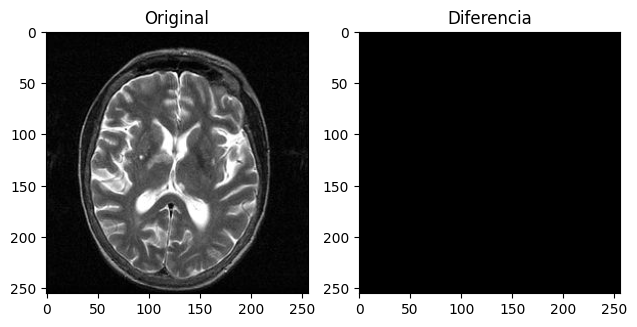

In [12]:
# CARGO IMAGEN:
entrada3 = cv.imread("/content/drive/My Drive/PDI/rmn.jpg",cv.IMREAD_GRAYSCALE)

img_resta = diferencia(entrada3,entrada3) # haciendo la diferencia de la imagen consigo misma obtengo negro (vector de ceros)

fig,ax=plt.subplots(1,2)
ax[0].imshow(entrada3, cmap='gray')
ax[0].set_title("Original")
ax[1].imshow(img_resta, cmap='gray')
ax[1].set_title("Diferencia")
plt.tight_layout()
plt.show()

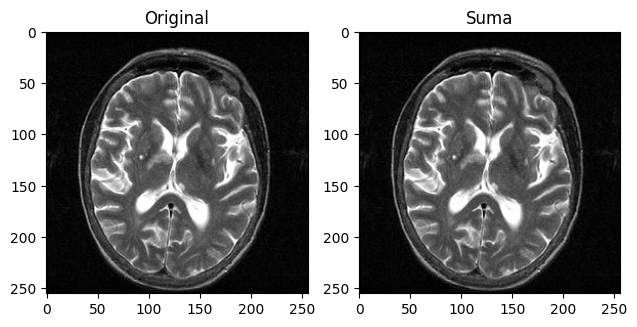

In [13]:
img_suma = suma(np.array([entrada3,entrada3,entrada3,entrada3]))  # sumo varias veces una consigo misma y obtengo la misma imagen

fig,ax=plt.subplots(1,2)
ax[0].imshow(entrada3, cmap='gray')
ax[0].set_title("Original")
ax[1].imshow(img_suma, cmap='gray')
ax[1].set_title("Suma")
plt.tight_layout()
plt.show()

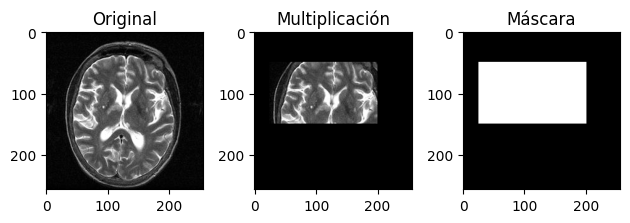

In [14]:
mascara = np.zeros((256,256))
mascara[50:150,25:200] = 1
img_multi = multiplicacion(entrada3,mascara)  # con multiplicacion puedo enmascarar lo que quiera de la imagen

fig,ax=plt.subplots(1,3)
ax[0].imshow(entrada3, cmap='gray')
ax[0].set_title("Original")
ax[1].imshow(img_multi, cmap='gray')
ax[1].set_title("Multiplicación")
ax[2].imshow(mascara, cmap='gray')
ax[2].set_title("Máscara")
plt.tight_layout()
plt.show()


2. A partir de un video (pedestrians.mp4) de una cámara de seguridad, debe obtener solamente el fondo de la imagen. Incorpore un elemento TrackBar que le permita ir eligiendo el número de frames a promediar para observarlos resultados instantáneamente.

In [15]:
from ipywidgets import interact, IntSlider

def obtener_fotograma_promedio(video, num_frames): # Función para obtener el fotograma promedio
    fondo_promedio = None
    for _ in range(num_frames):
        ret, frame = video.read()   # lee el frame
        if not ret:
            break
        if fondo_promedio is None: # en la primera iteracion es none el promedio
            fondo_promedio = np.float32(frame)  # le asigno el valor del primer frame
        else:
            fondo_promedio += frame # voy sumando los frames
    fondo_promedio /= num_frames    # promedio
    return np.uint8(fondo_promedio) # si no lo convierto a uint8 pasan desgracias

video = cv.VideoCapture("/content/drive/My Drive/PDI/pedestrians.mp4")

max_frames = int(video.get(cv.CAP_PROP_FRAME_COUNT)) # determino número máx de fotogramas: para este video hay hasta 100
@interact(num_frames=IntSlider(min=1, max=max_frames, step=1, value=100, description='Número de fotogramas'))  # el @ lo hace una función interactive en Colab
# la trackbar va de 1 a 100 fotogramas, con paso 1 y el plot inicial cuando corremos el código promedia 100 fotogramas

def actualizar_fotograma_promedio(num_frames):
    video.set(cv.CAP_PROP_POS_FRAMES, 0)  # reinicia el video al principio para tomar los num_frames frames
    fotograma_promedio = obtener_fotograma_promedio(video, num_frames) # muestra el fotograma promedio
    plt.imshow(fotograma_promedio)
    plt.axis('off')
    plt.show()


interactive(children=(IntSlider(value=100, description='Número de fotogramas', min=1), Output()), _dom_classes…

## **Ejercicio 4:** Trabajos de aplicación
1. Utilizando las técnicas aprendidas, descubra que objetos no están perceptibles en la imagen earth.bmp y realce la imagen de forma que los objetos se vuelvan visibles con buen contraste sin realizar modificaciones sustanciales en el restode la imagen.

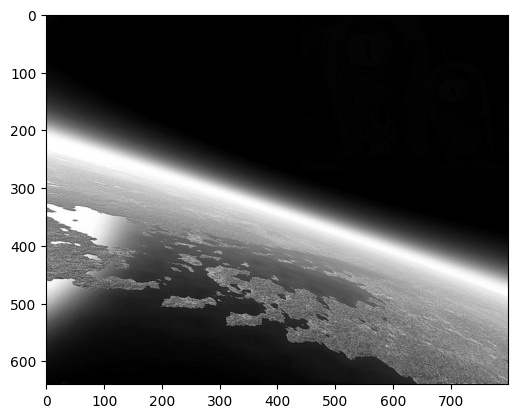

In [16]:
earth = cv.imread("/content/drive/My Drive/PDI/earth.bmp",cv.IMREAD_GRAYSCALE)

fig = plt.figure()
plt.imshow(earth,cmap='gray')
plt.show()

Primero vemos la imagen. Se nota muy ligeramente que hay algo en la esquina superior derecha, por lo que hacemos una máscara binaria para destacar esa parte en particular. Siguiendo los ejes de la gráfica, vemos que la máscara binaria debería ser 0 para toda la imagen excepto un recuadro de, aproximadamente, x=430 a x=800, y=0 a y=270.

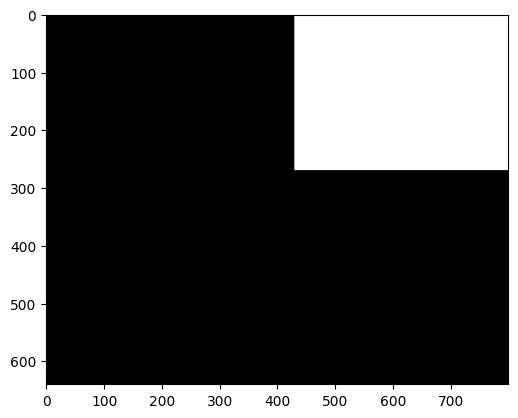

In [17]:
mask_bin = earth.copy()
mask_bin[:,:] = 0
mask_bin[0:270,430:800] = 1   # rango es [y,x]

fig = plt.figure()
plt.imshow(mask_bin,cmap='gray')
plt.show()

Le aplicamos la transformación a la imagen, le hacemos la máscara y combinamos la parte transformada con la no transformada de la imagen original.

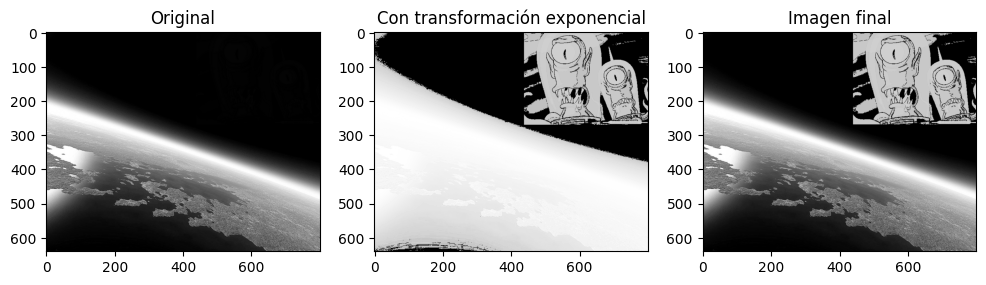

In [18]:
mapeo_pow = t_pow(0.05)  # gamma > 1 oscurece, gamma < 1 aclara. Ponemos un gamma chiquito para que se vea la imagen que estaba oscurecida.

earth_pow = earth.copy()  # aplicamos transformación
earth_pow[:] = mapeo_pow[earth[:]]

earth_final = earth.copy()  # ahora generamos la imagen para mantener todas las otras zonas sin transformar
earth_final[mask_bin > 0] = earth_pow[mask_bin > 0]  # con la máscara, los lugares que quiero transformar los igualo a la parte transformada. los otros quedan como la imagen original.

plt.close()
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,12))
ax[0].imshow(earth,cmap="gray",vmin=0,vmax=255)
ax[0].set_title("Original")
ax[1].imshow(earth_pow,cmap="gray",vmin=0,vmax=255)
ax[1].set_title("Con transformación exponencial")
ax[2].imshow(earth_final,cmap="gray",vmin=0,vmax=255)
ax[2].set_title("Imagen final")
plt.show()

2. Al final del proceso de manufactura de placas madres, de marca ASUS modeloA7V600, se obtienen dos clases de producto final: A7V600-x y A7V600-SE.Implemente un algoritmo, que a partir de una imagen, determine que tipo de placa es. Haga uso de las técnicas de realce apendidas y utilice las imágenes a7v600-x.gif y a7v600-SE.gif. Adapte el método de forma que contemple el reconocimiento de imágenes que han sido afectadas por un ruido aleatorio impulsivo (a7v600-x(RImpulsivo).gif y a7v600-SE(RImpulsivo).gif ).

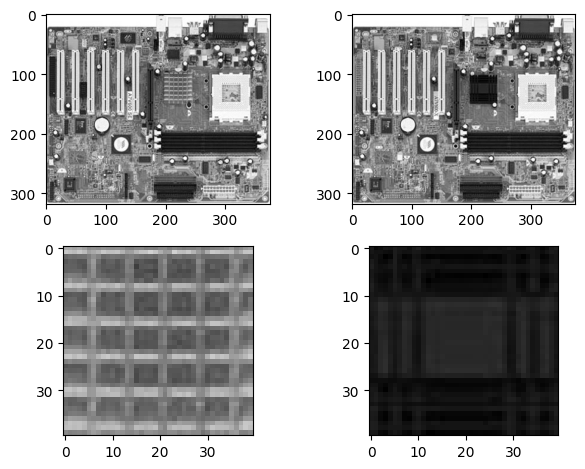

In [41]:
# hay que pasar los .gif a .jpg o .png porque OpenCV no soporta .gif segun la página zzzz
se = cv.imread("/content/drive/My Drive/PDI/a7v600-SE.jpg",cv.IMREAD_GRAYSCALE)
x = cv.imread("/content/drive/My Drive/PDI/a7v600-X.jpg",cv.IMREAD_GRAYSCALE)

# Hay un componente en el medio que difiere mucho entre las dos placas
se_comp = se[105:145,200:240]
x_comp = x[105:145,200:240]

fig,ax = plt.subplots(2,2) # muestro imagenes de las placas y de los componentes que son distintos
ax[0,0].imshow(se,cmap='gray',vmin=0,vmax=255)
ax[0,1].imshow(x,cmap='gray',vmin=0,vmax=255)
ax[1,0].imshow(se_comp,cmap='gray',vmin=0,vmax=255)
ax[1,1].imshow(x_comp,cmap='gray',vmin=0,vmax=255)
plt.tight_layout()
plt.show()

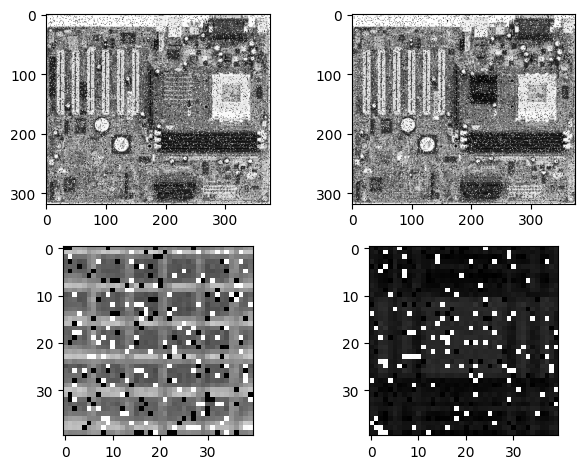

SE con ruido tiene diferencia de 1.5 con SE y 101.76 con X
X con ruido tiene diferencia de 86.34 con SE y 13.92 con X


In [44]:
# obtengo las medias de estas áreas. Vemos que el componente de la placa SE es mucho más claro que el de la X. Esto se debería mantener sacando un promedio de los pixeles en el rango aún con ruido.
mean_se = np.mean(se_comp)
mean_x = np.mean(x_comp)

# cargamos imagenes con ruido
se_ruido = cv.imread("/content/drive/My Drive/PDI/a7v600-SE(RImpulsivo).jpg",cv.IMREAD_GRAYSCALE)
x_ruido = cv.imread("/content/drive/My Drive/PDI/a7v600-X(RImpulsivo).jpg",cv.IMREAD_GRAYSCALE)

se_ruido_comp = se_ruido[105:145,200:240]
x_ruido_comp = x_ruido[105:145,200:240]

fig,ax = plt.subplots(2,2) # muestro imagenes de las placas con ruido y de los componentes que son distintos
ax[0,0].imshow(se_ruido,cmap='gray',vmin=0,vmax=255)
ax[0,1].imshow(x_ruido,cmap='gray',vmin=0,vmax=255)
ax[1,0].imshow(se_ruido_comp,cmap='gray',vmin=0,vmax=255)
ax[1,1].imshow(x_ruido_comp,cmap='gray',vmin=0,vmax=255)
plt.tight_layout()
plt.show()

# obtengo medias de las áreas con ruido para comparar con las originales
mean_se_ruido = np.mean(se_ruido_comp)
mean_x_ruido = np.mean(x_ruido_comp)

print(f"SE con ruido tiene diferencia de {np.round(np.abs(mean_se - mean_se_ruido),2)} con SE y {np.round(np.abs(mean_x - mean_se_ruido),2)} con X")
print(f"X con ruido tiene diferencia de {np.round(np.abs(mean_se - mean_x_ruido),2)} con SE y {np.round(np.abs(mean_x - mean_x_ruido),2)} con X")

Vemos que ambos casos con ruido tienen mucha menos diferencia de media con el tipo de placa que le corresponde, que con el otro tipo de placa. Luego, podemos utilizar este método para clasificarlas.

3. En una fábrica de medicamentos se desea implementar un sistema para la
inspección visual automática de blisters en la línea de empaquetado. La adquisición de la imagen se realiza en escala de grises mediante una cámara
CCD fija y bajo condiciones controladas de iluminación, escala y enfoque. El
objetivo consiste en determinar en cada instante si el blister que está siendo
analizado se encuentra incompleto, en cuyo caso la región correspondiente a
la píldora faltante presenta una intensidad similar al fondo. Escriba una función que reciba como parámetro la imagen del blister a analizar y devuelva
un mensaje indicando si el mismo contiene o no la totalidad de las píldoras. En caso de estar incompleto, indique la posición (x,y) de las píldoras
faltantes. Verifique el funcionamiento con las imágenes blister completo.jpg y
blister incompleto.jpg.


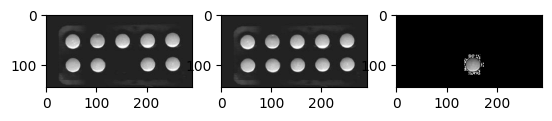

Falta la pastilla en la columna 3, fila 2.


In [82]:
# Cargo las imágenes
blister_incompleto = cv.imread('/content/drive/My Drive/PDI/blister_incompleto.jpg',cv.IMREAD_GRAYSCALE)
blister = cv.imread('/content/drive/My Drive/PDI/blister_completo.jpg',cv.IMREAD_GRAYSCALE)
blister_resta = blister[:,0:291] - blister_incompleto  # por alguna razón tienen tamaños distintos (144,292) y (144,291)

# Visualizamos las imágenes para analizar el problema mejor
fig,ax = plt.subplots(1,3)
ax[0].imshow(blister_incompleto,cmap="gray",vmin=0,vmax=255)
ax[1].imshow(blister,cmap="gray",vmin=0,vmax=255)
ax[2].imshow(blister_resta,cmap="gray",vmin=0,vmax=255) # en la resta se ve donde está la diferencia entre los blisters
plt.show()
# Analizando los plots, aproximadamente cada 50 posiciones de x y 50 posiciones de y tenemos el centro de una pastilla nueva.

# Ahora determinamos qué posición del blister ocupa esa parte de la resta con información.
for i in np.arange(5):  # para cada columna
    for j in np.arange(2):  # para cada fila
        if blister_incompleto[j*50+50,i*50+50]<80:   # j*50+50 para j = 0 es 50, para j = 1 es 100, para j = 2 es 150 y así sucesivamente. Lo mismo para i*50+50
                                                      # Mientras no tome (aprox) más de 160 o menos de 35 de umbral funciona bien. Entre 35 y 150 debería andar, lo ponemos por el medio por robustez.
          print(f'Falta la pastilla en la columna {i+1}, fila {j+1}.')

# **Manejo de histograma**

## **Ejercicio 1:**
Cargue y visualice la imágenes patron2.tif y patron.tif (a esta última utilícela a escala de grises).
Reflexione acerca de que histograma espera obtener para cada una.
Obtenga los histogramas y grafíquelos.
Identifique la información suministrada y analícela en relación a su expectativa.


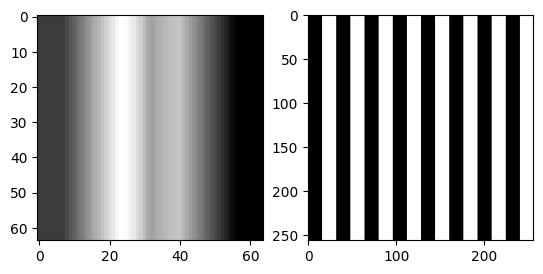

In [4]:
# CARGO IMAGENES:
patron1 = cv.imread("/content/drive/My Drive/PDI/patron.tif",cv.IMREAD_GRAYSCALE)
patron2 = cv.imread("/content/drive/My Drive/PDI/patron2.tif",cv.IMREAD_GRAYSCALE)
# GRAFICO:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(patron1, cmap='gray')
ax[1].imshow(patron2, cmap='gray')
plt.show()

Asumimos que el histograma del patrón 1 va a comprender más valores del 0 al 255 ya que tiene distintos niveles de grises; mientras que el patrón 2 debería mostrar sólo información en el 0 y el 255, correspondientes al blanco y al negro.

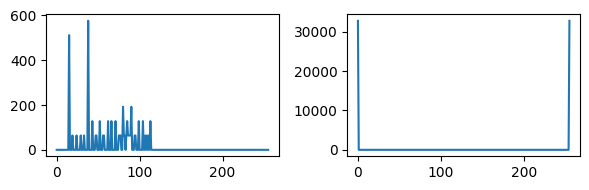

In [5]:
# calcHist tiene 5 parámetros:
# [imagen]: tiene la imagen a analizar como lista
# [channels]: para grises tengo [0], si quiero tres canales pongo [0,1,2]
# mask: para enfocarnos en cierta área. con None tomo todo.
# histSize: numero de bins para el histograma
# ranges: rango de posibles valores para los pixeles, con el limite superior no inclusivo. para rgb [0,256). si tengo tramos pongo [0,256,0,256,0,256] por ejemplo

histograma1 = cv.calcHist([patron1], [0], None, [256], [0,256])
histograma2 = cv.calcHist([patron2], [0], None, [256], [0,256])

fig, ax = plt.subplots(1, 2,figsize = (6,2))
ax[0].plot(histograma1)
ax[1].plot(histograma2)
plt.tight_layout()
plt.show()

2. Los archivos histo1.tif, histo2.tif, histo3.tif, histo4.tif e histo5.tif contienen histogramas de imágenes con diferentes características.
Analizando solamente los archivos de histograma y realice una descripción de la imagen a la que corresponden.

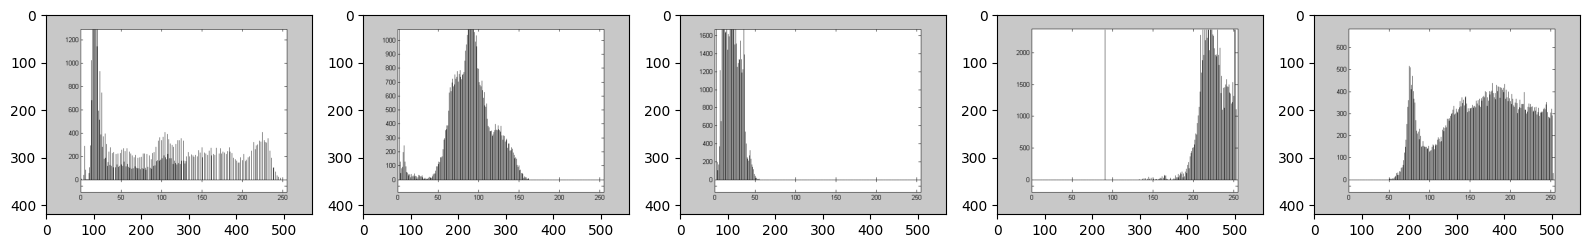

In [6]:
histo1 = cv.imread("/content/drive/My Drive/PDI/histo1.tif",cv.IMREAD_GRAYSCALE)
histo2 = cv.imread("/content/drive/My Drive/PDI/histo2.tif",cv.IMREAD_GRAYSCALE)
histo3 = cv.imread("/content/drive/My Drive/PDI/histo3.tif",cv.IMREAD_GRAYSCALE)
histo4 = cv.imread("/content/drive/My Drive/PDI/histo4.tif",cv.IMREAD_GRAYSCALE)
histo5 = cv.imread("/content/drive/My Drive/PDI/histo5.tif",cv.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(1, 5, figsize = (16,6))
ax[0].imshow(histo1,cmap='gray')
ax[1].imshow(histo2,cmap='gray')
ax[2].imshow(histo3,cmap='gray')
ax[3].imshow(histo4,cmap='gray')
ax[4].imshow(histo5,cmap='gray')
plt.tight_layout()
plt.show()

*   **histo1:** la imagen tiene muchos valores de gris distintos. Tiene más partes negras pero tiene casi todos los valores. Tiene buen contraste.
*   **histo2:** la imagen no es ni tan oscura ni tan clara, tiene grises y no tiene colores blancos. No tiene buen contraste.
*   **histo3:** la imagen es muy oscura, tiene color negros y grises oscuros. No tiene buen contraste.
*   **histo4:** la imágen es muy clarita, tiene color blanco y grises claros. No tiene buen contraste.
*   **histo4:** la imágen no tiene colores oscuros, tiene medios y claros. Tiene buen contraste.

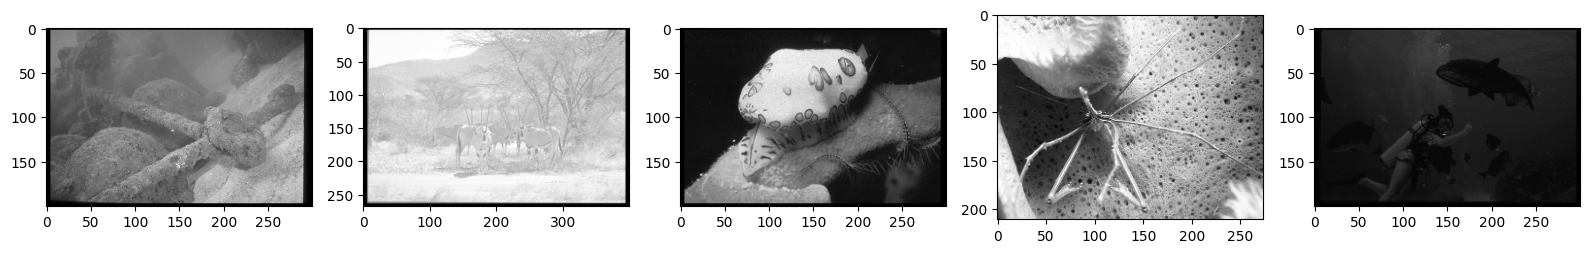

In [7]:
imagenA = cv.imread("/content/drive/My Drive/PDI/imagenA.tif",cv.IMREAD_GRAYSCALE)
imagenB = cv.imread("/content/drive/My Drive/PDI/imagenB.tif",cv.IMREAD_GRAYSCALE)
imagenC = cv.imread("/content/drive/My Drive/PDI/imagenC.tif",cv.IMREAD_GRAYSCALE)
imagenD = cv.imread("/content/drive/My Drive/PDI/imagenD.tif",cv.IMREAD_GRAYSCALE)
imagenE = cv.imread("/content/drive/My Drive/PDI/imagenE.tif",cv.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(1, 5, figsize = (16,6))
ax[0].imshow(imagenA,cmap='gray')
ax[1].imshow(imagenB,cmap='gray')
ax[2].imshow(imagenC,cmap='gray')
ax[3].imshow(imagenD,cmap='gray')
ax[4].imshow(imagenE,cmap='gray')
plt.tight_layout()
plt.show()

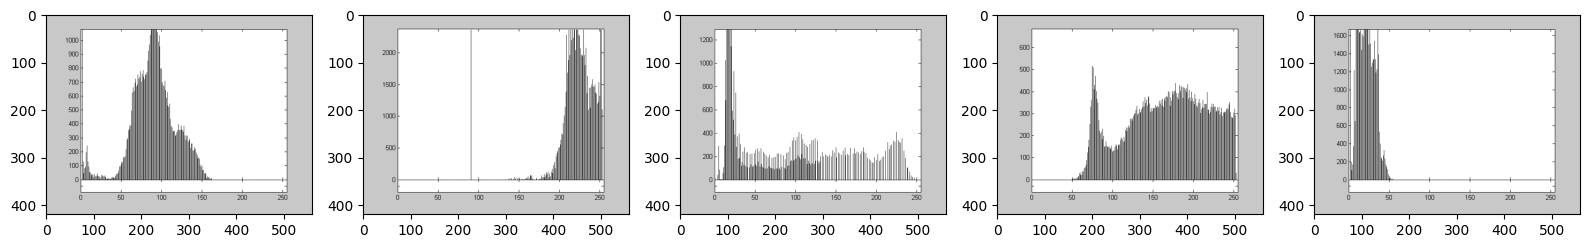

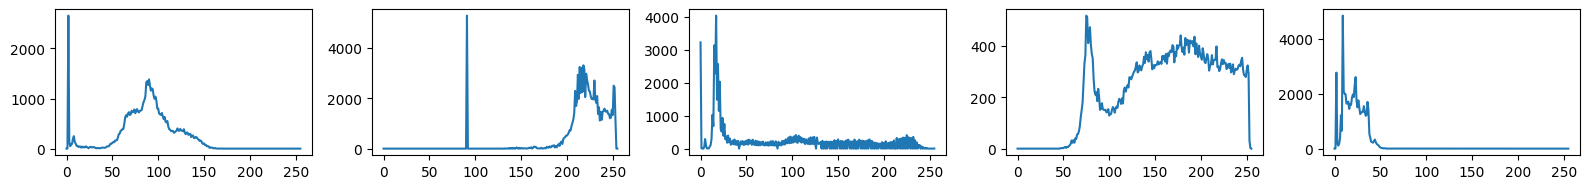

In [41]:
histo_real_1 = cv.calcHist([imagenA], [0], None, [256], [0,256])
histo_real_2 = cv.calcHist([imagenB], [0], None, [256], [0,256])
histo_real_3 = cv.calcHist([imagenC], [0], None, [256], [0,256])
histo_real_4 = cv.calcHist([imagenD], [0], None, [256], [0,256])
histo_real_5 = cv.calcHist([imagenE], [0], None, [256], [0,256])

fig, ax = plt.subplots(1, 5, figsize = (16,6))  # Alineo plots de predicción y la real para comparar
ax[0].imshow(histo2,cmap='gray')  # predicción para imagen A
ax[1].imshow(histo4,cmap='gray')  # predicción para imagen B
ax[2].imshow(histo1,cmap='gray')  # ...
ax[3].imshow(histo5,cmap='gray')
ax[4].imshow(histo3,cmap='gray')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 5, figsize = (16,2))
ax[0].plot(histo_real_1) # histograma real para imagen A
ax[1].plot(histo_real_2) # histograma real para imagen B
ax[2].plot(histo_real_3) # ...
ax[3].plot(histo_real_4)
ax[4].plot(histo_real_5)
plt.tight_layout()
plt.show()

soy buenisima y lo adivine bien LO JURO

Obtenga y analice la utilidad de las siguientes propiedades estadísticas de los histogramas: media, varianza, asimetría, energía y entropía.


In [61]:
def calcular_propiedades(h): # calculo todas las propiedades para un histograma
  histograma_norm = h.ravel()/h.sum()  # aplano el vector y normalizo

  media = np.sum(histograma_norm * np.arange(256))
  varianza = np.sum(histograma_norm * ((np.arange(256) - media) ** 2))
  asimetria = np.sum(histograma_norm * ((np.arange(256) - media) ** 3)) / (varianza ** (3/2))
  energia = np.sum(histograma_norm ** 2)
  entropia = -np.sum(histograma_norm * np.log2(histograma_norm + 1e-7)) # agrego 1e-7 para que no divida por 0
  return media, varianza, asimetria, energia, entropia

lista_histo = [histo_real_1,histo_real_2,histo_real_3,histo_real_4,histo_real_5]
resultados = {}

for i, n_histo in enumerate(lista_histo, start=1):  # paso todos los histogramas x la func y me guardo en un diccionario para mostrarlos dsps
    media, varianza, asimetria, energia, entropia = calcular_propiedades(n_histo)
    resultados[f'Imagen {i}'] = {
        'Media': media,
        'Varianza': varianza,
        'Asimetría': asimetria,
        'Energía': energia,
        'Entropía': entropia
    }

# los :<10 hacen espacios entre las palabras
print("{:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format('Imagen', 'Media', 'Varianza', 'Asimetría', 'Energía', 'Entropía'))
for imagen, props in resultados.items():
    # los .2f me acortan el resultado a dos decimales (puedo poner 3,4,5,...)
    print("{:<10} {:<10.2f} {:<10.2f} {:<10.2f} {:<10.2f} {:<10.2f}".format(imagen, props['Media'], props['Varianza'], props['Asimetría'], props['Energía'], props['Entropía']))

Imagen     Media      Varianza   Asimetría  Energía    Entropía  
Imagen 1   87.23      1010.37    -0.79      0.01       6.59      
Imagen 2   218.15     1089.35    -2.74      0.02       5.86      
Imagen 3   77.66      5079.12    0.79       0.02       6.74      
Imagen 4   165.94     2663.74    -0.24      0.01       7.51      
Imagen 5   20.88      114.58     0.34       0.03       5.20      


*   **Media:** Si las medias son parecidas entre los histogramas tienen valores centrales parecidos. Me dice en qué valor de gris se concentran en promedio los píxeles.
*   **Varianza:** Me dice la concentración de los datos alrededor de la media. Si es más baja, los valores de gris de los pixeles están cerquita de la media, sino lo contrario.
*   **Asimetría:** Si es positiva está sesgada a la izquierda (tiene más datos a la derecha de la media). Si es negativa está sesgada a la derecha (más datos a la izquierda de la media). Si es 0 es simétrica.
*   **Energía:** Valores más altos de energía pueden indicar una mayor concentración de datos en ciertas regiones del histograma.
*   **Entropía:** Si los valores de grises están bien distribuidos por la imagen (alto contraste) tienen más entropía porque hay más incerteza de que un pixel sea de cierto gris. Si los valores están concentrados en una zona entonces hay menor entropía porque tengo más certeza de que los valores de girs de los píxeles van a estar más que nada en esa zona concentrada.




3. Cargue una imagen y realice la ecualizaci´on de su histograma.
img equ = cv2.equalizeHist(img)
Muestre en una misma ventana la imagen original, la versi´on ecualizada
y sus respectivos histogramas.
Estudie la informaci´on suministrada por los histogramas. ¿Qu´e diferencias nota respecto a las definiciones te´oricas?


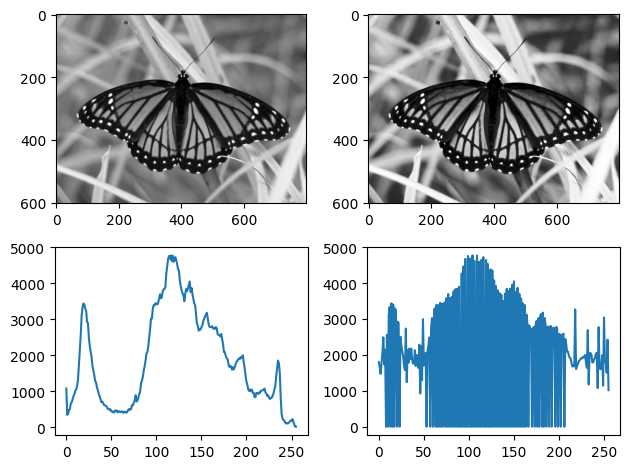

In [ ]:
# Obtengo imágenes
img_orig = cv.imread("/content/drive/My Drive/PDI/mariposa02.png",cv.IMREAD_GRAYSCALE)
img_equ = cv.equalizeHist(img_orig)

# Realizo histogramas
histo_orig = cv.calcHist([img_orig], [0], None, [256], [0,256])
histo_equ = cv.calcHist([img_equ], [0], None, [256], [0,256])

fig,ax = plt.subplots(2,2)
ax[0,0].imshow(img_orig,cmap='gray')
ax[0,1].imshow(img_equ,cmap='gray')
ax[1,0].plot(histo_orig)
ax[1,1].plot(histo_equ)

plt.tight_layout()
plt.show()

Para este ejemplo, vemos que los valles en la versión ecualizada ya no son tan pronunciados. Aparecen valores de grises que antes no tenía tanto como otros. Sigue habiendo picos (no es como las definiciones teóricas donde todos los valores de gris se aplanan a un mismo nivel) pero ya no tan pronunciados como en la original sino que **se distribuyen**. Ésto se puede ver en la imagen como la mejora del contraste.

Probamos con otras imagenes:

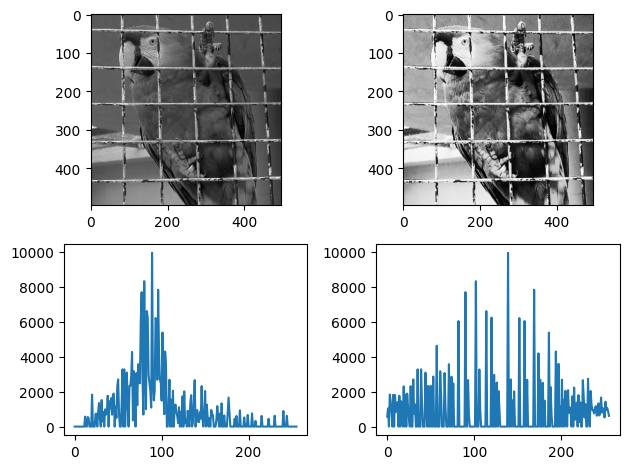

In [ ]:
#img_orig = cv.imread("/content/drive/My Drive/PDI/flores02.jpg",cv.IMREAD_GRAYSCALE)
img_orig = cv.imread("/content/drive/My Drive/PDI/parrot.tif",cv.IMREAD_GRAYSCALE)
#img_orig = cv.imread("/content/drive/My Drive/PDI/flowers_oscura.tif",cv.IMREAD_GRAYSCALE)
img_equ = cv.equalizeHist(img_orig)

histo_orig = cv.calcHist([img_orig], [0], None, [256], [0,256])
histo_equ = cv.calcHist([img_equ], [0], None, [256], [0,256])

fig,ax = plt.subplots(2,2)
ax[0,0].imshow(img_orig,cmap='gray')
ax[0,1].imshow(img_equ,cmap='gray')
ax[1,0].plot(histo_orig)
ax[1,1].plot(histo_equ)
plt.tight_layout()
plt.show()

## **Ejercicio 2:** Trabajos de aplicación

1. En la imagen cuadros.tif se observa un conjunto de cuadros negros sobre un fondo casi uniforme. Utilice ecualización local del histograma para revelar los detalles ocultos en la imagen y compare los resultados con los obtenidos con ecualización global.


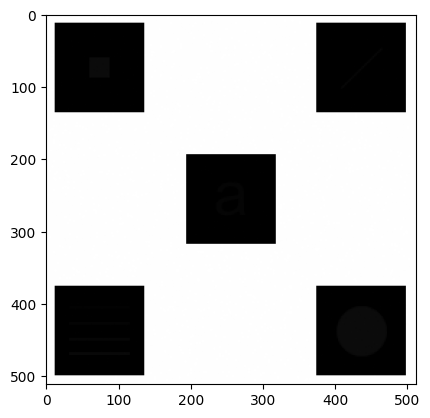

In [63]:
# Obtengo imágenes
img_cuadros = cv.imread("/content/drive/My Drive/PDI/cuadros.tif",cv.IMREAD_GRAYSCALE)

plt.imshow(img_cuadros,cmap='gray')
plt.show()

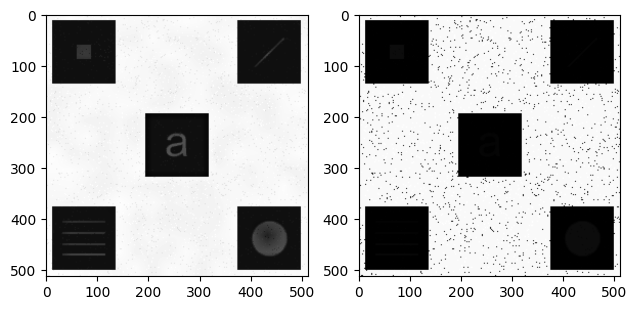

In [81]:
clahe = cv.createCLAHE(clipLimit=20.0, tileGridSize=(16,16))  # cambiando clipLimit me cambia el punto de contraste para ecualización. me aparecen más o menos puntitos también.
equ_local = clahe.apply(img_cuadros)

equ_global = cv.equalizeHist(img_cuadros) # en el global no puedo cambiar los argumentos y me aparecen esos puntitos en el medio.

fig,ax = plt.subplots(1,2)
ax[0].imshow(equ_local,cmap='gray')
ax[1].imshow(equ_global,cmap='gray')
plt.tight_layout()
plt.show()

2. Realice un algoritmo de búsqueda por correlación de histogramas de intensidad. Se debe informar el contenido de la imagen: Bandera, Caricatura, Personaje o Paisaje. Utilice las imágenes disponibles en Busqueda-histograma.zip.


La imagen es de la categoría Personaje.


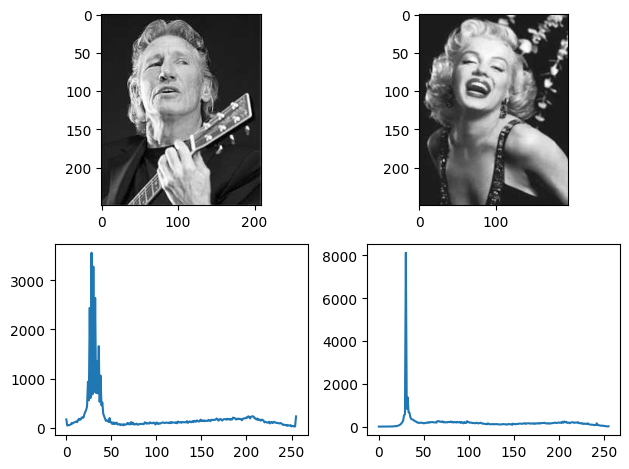

In [137]:
# Cargar las imágenes de consulta
imagen_consulta = cv.imread('/content/drive/My Drive/PDI/BusquedaHistograma/Personaje05.jpg', cv.IMREAD_GRAYSCALE)
histograma_consulta = cv.calcHist([imagen_consulta], [0], None, [256], [0, 256])

# Cargar las imágenes de referencia y sus etiquetas
imagenes_referencia = []
etiquetas_referencia = []

categorias = ['Bandera', 'Caricaturas', 'Personaje', 'Paisaje']
for categoria in categorias:
    for i in range(1, 5): # guardo la imagen 5 de cada categoría para probar
        img_ref = cv.imread(f'/content/drive/My Drive/PDI/BusquedaHistograma/{categoria}0{i}.jpg', cv.IMREAD_GRAYSCALE)
        imagenes_referencia.append(img_ref)  # guardo histogramas
        etiquetas_referencia.append(categoria)      # con su respectiva categoría en el mismo índice

# Calcular la correlación de histogramas entre la imagen de consulta y las imágenes de referencia
resultados_correlacion = []
for img_ref in imagenes_referencia:
    hist_ref = cv.calcHist([img_ref], [0], None, [256], [0, 256])
    correlacion = cv.compareHist(histograma_consulta, hist_ref, cv.HISTCMP_CORREL)
    resultados_correlacion.append(correlacion)

# Identificar la imagen de referencia con la mayor correlación
indice_max_correlacion = np.argmax(resultados_correlacion)
categoria = etiquetas_referencia[indice_max_correlacion]

# Mostrar el resultado
print(f"La imagen es de la categoría {categoria}.")

# Ploteo las imagenes y los histogramas para ver
fig,ax = plt.subplots(2,2)
ax[0,0].imshow(imagen_consulta,cmap='gray')
ax[0,1].imshow(imagenes_referencia[indice_max_correlacion],cmap='gray')
ax[1,0].plot(histograma_consulta)
histograma_ref = cv.calcHist([imagenes_referencia[indice_max_correlacion]], [0], None, [256], [0, 256])
ax[1,1].plot(histograma_ref)
plt.tight_layout()
plt.show()

Andan bien los ejemplos Caricaturas05, Personaje05, Paisaje05, pero se confunde Bandera05 con la categoría Caricatura. Posiblemente porque es muy distinta la bandera de Estados Unidos de las otras dentro de la 'base de datos'. Si estuviera la de Chile entre las referencias seguramente daría bien jaj.